<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
# feel free to import other libraries! 
# Still learning python data science syntax (prior experience all using R), will catch up soon. 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<`Math score for 4th grade`>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
df.shape

(1715, 25)

In [4]:
#get an understanding of the data
df.head(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


In [5]:
#Check column name
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [6]:
#Rename
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [7]:
#drop row with missing value in avg_math_4_score
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

In [8]:
df.describe()

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,565.000000,3.980000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,3.980000e+02,...,491.000000,491.000000,491.000000,3.980000e+02,4.490000e+02,4.910000e+02,565.000000,564.000000,521.000000,478.000000
mean,2008.653097,9.428040e+05,1.021679e+07,9.105977e+05,4.717920e+06,4.588268e+06,1.032646e+07,5.345064e+06,3.015816e+06,4.874543e+05,...,72460.873727,72431.075356,64304.798371,5.810083e+05,2.878254e+05,9.647332e+05,236.327434,279.310284,219.796545,263.870293
std,7.413808,1.114194e+06,1.285581e+07,1.297155e+06,6.045521e+06,5.987918e+06,1.310309e+07,6.881358e+06,3.657841e+06,5.869066e+05,...,85064.551144,84302.796730,76243.626074,6.854742e+05,3.408781e+05,1.131442e+06,9.285505,9.518487,6.962321,6.513002
min,1990.000000,4.417900e+04,5.594810e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.310700e+04,...,4643.000000,3371.000000,2785.000000,3.769800e+04,1.378100e+04,6.892500e+04,192.000000,235.000000,188.000000,238.000000
25%,2005.000000,2.754622e+05,2.600654e+06,2.342685e+05,1.341450e+06,8.735868e+05,2.520274e+06,1.355798e+06,7.700552e+05,1.290740e+05,...,20499.500000,20926.500000,18536.500000,1.658642e+05,8.157100e+04,2.810865e+05,232.000000,274.000000,216.000000,260.000000
50%,2009.000000,6.625380e+05,5.721013e+06,5.277240e+05,2.906463e+06,2.321530e+06,5.773808e+06,2.976032e+06,1.724142e+06,3.379880e+05,...,50918.000000,49993.000000,41118.000000,4.037075e+05,1.871180e+05,6.774110e+05,238.000000,281.000000,221.000000,265.000000
75%,2015.000000,1.025396e+06,1.166697e+07,1.007900e+06,5.880226e+06,5.228991e+06,1.139698e+07,5.989623e+06,3.474660e+06,5.654545e+05,...,81431.000000,81367.000000,76096.500000,6.452258e+05,3.291480e+05,1.079075e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,280.000000


<h2> Feature Selection </h2>

_Use this space to modify or create features_

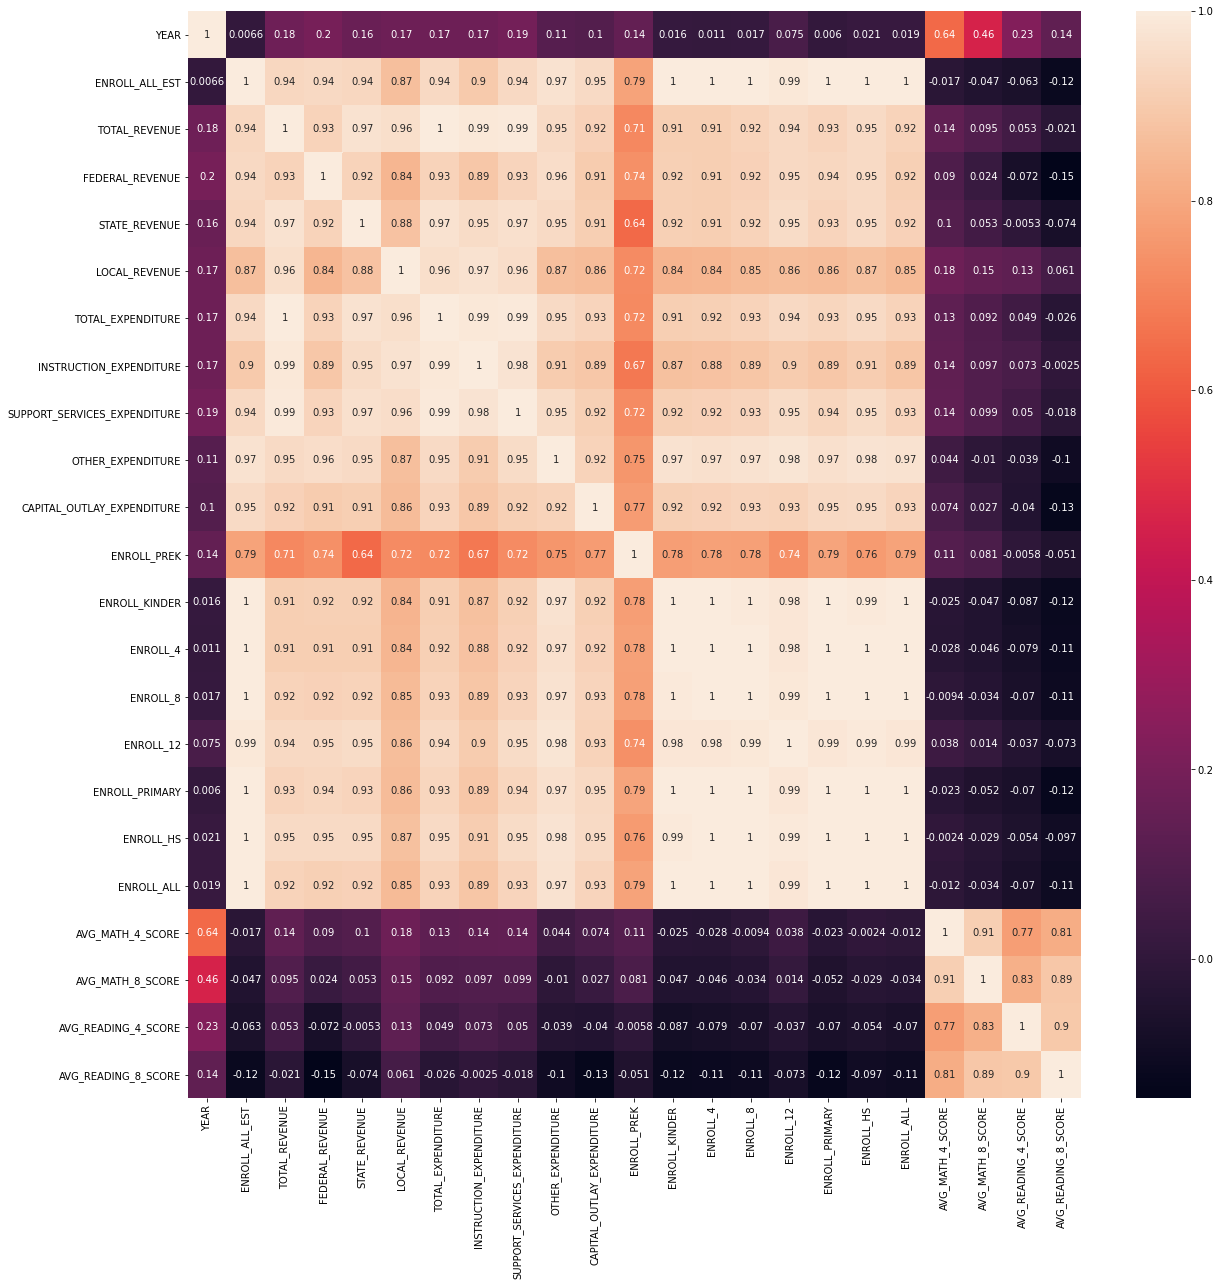

In [9]:
# set fig and axis size to fit for later graph 
fig, ax = plt.subplots(figsize=(20, 20))
# heatmap showing correlation, and we want it to be annotated. 
sns.heatmap(df.corr(), annot = True, xticklabels = df.corr().columns.values,
            yticklabels = df.corr().columns.values)

Final feature list: **<YEAR, AVG_READING_8_SCORE>**

Feature selection justification: **< `I used correlation heatmap to make the selection of features. I picked the three with highest correlation, and it is to investigate whether academic achievement share similar pattern regardless of grade and exam type. I didn't not pick other academic score as predictors because it will likely cause collinearity.`>**

<h2> EDA </h2>

Visualization 1

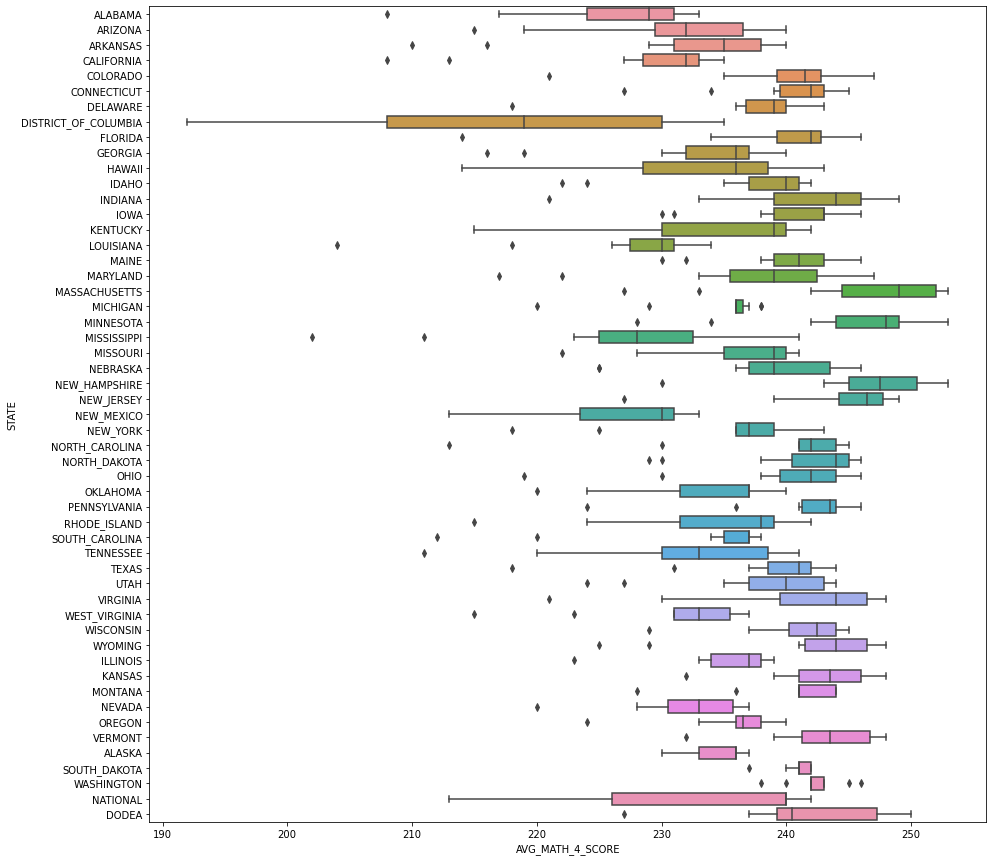

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x="AVG_MATH_4_SCORE", y="STATE", data=df)

**<`This boxplot graph is to get a better understanding of how different academic performace, specficially average math score for fourth grader varies among different states. It is expected to see Massachusatts has the highest average score, about 10 points higher than national average. This means that on average Massachusatts 4th grader has reached NAEP proficient across many years. This graph bascially indicates some small aspect on a state educational strength.>**

Visualization 2

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


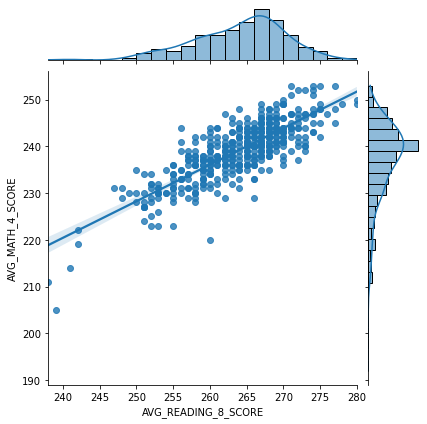

In [11]:
sns.jointplot("AVG_READING_8_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

**<`This is a graph that regress Average math score of 4th grader on average reading score of 8th grader. It shows that there is a clear linear relationship, meaning that generally, the academic achivement of a place grows regardless of grade and type of exam. The two graphs below further prove this.`>**

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


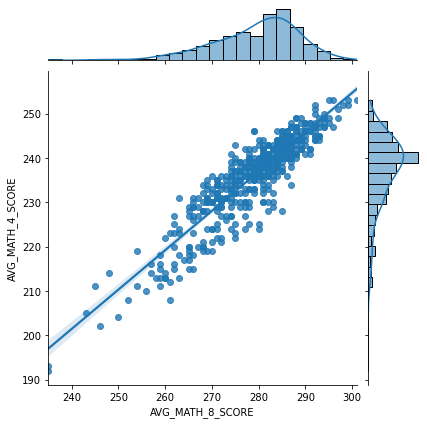

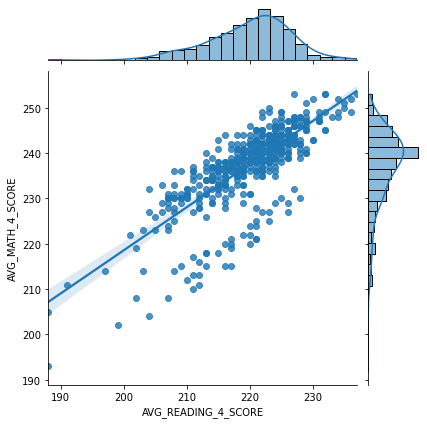

In [12]:
sns.jointplot("AVG_MATH_8_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")
sns.jointplot("AVG_READING_4_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['AVG_READING_8_SCORE','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<`REGRESSION`>**

In [16]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [17]:
# create your model here
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(model.intercept_)
print(model.coef_)

-375.31657680243075
[0.76367963 0.20535153]


In [21]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.704149211406383

In [22]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.23739455683337762

In [23]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.7846212899603775

In [24]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.466949602917257

In [25]:
# for classification didnt use here
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

Text(0, 0.5, 'AVG_MATH_4_SCORE')

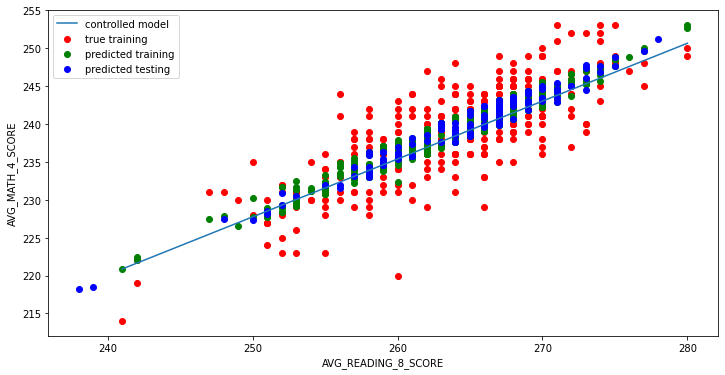

In [26]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name ="AVG_READING_8_SCORE"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_4_SCORE")

<h2> Summary </h2>

**<`The linear model I created use average readings score of 8th grader and year to predict the average score if math for 4th grader. The R^2 is 0.70, and the mean error is quite small. We also have a small root mean error. All these indicate that this model is decent. It implies that regardless of grade and exam type, states tend to improve their educational performace as a whole. The average reading score makes a decent prediction of average math score.`>**